#**Instructions:**#
*Follow the instructions below to code, generate results (numbers, tables, figures), and
discuss your findings. Summarize your observations
and show results to support them. Submit 1) **code** and 2) **discussions and results** as required by each
assignment, using this iPython notebook template. You must
submit a PDF including them
**and** a link to your Colab page at the bottom of this template to receive
full credit. You are encouraged to collaborate and discuss the assignment, but
you **HAVE** to write your submission by yourself. Identical submissions will be regarded as plagiarism.*   \\
Please us the following tutorials- [GoogleColab: Setup](https://www.geeksforgeeks.org/how-to-use-google-colab/) and [Google Colab: Getting Started](https://colab.research.google.com/notebooks/welcome.ipynb) to gain familiarity with the Google Colab environment. \\
Here is another excellent [post](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663) for getting familiar with Jupyter Notebooks. \\
**Note**: For submitting your solutions, do the following:  \\
**1.** Add link to this colab notebook in the last cell of this notebook.  
**2.** **File -> Save -> Print -> Save as PDF** and upload the pdf to gradescope.


**Poisson Regression** \\
To help you better understand how to select stepsizes for basic gradient descent
algorithms, we will look at the case of Poisson Regression. As discussed in class, you cannot calculate a
stepsize using Lipschitz continuity that gurantees convergence in this case. \\
**Step 1**: Generate data. Set numpy’s random seed to 0. Then, let M = 200 and N = 5. Generate the
matrix of covariates $A \in R^{M×N}$
, which has i.i.d. entries distributed as N (0, 0.25). Note: you can play
around with different choices of these parameters, but the results have to be generated using these. Use the
same method, generate the regression coefficient vector $x \in R^N$ as well. Then, generate the observation
vector $y \in N^M$ as \\
>$y \sim Pois(e^{Ax})$  


You can use np.random.normal() and np.random.poisson(). 
**Note:** use vector forms in your code. Do NOT write loops except for the outer iterations.

In [0]:

import timeit
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import math

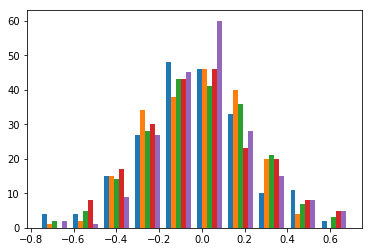

In [0]:
np.random.seed(0)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)
y = np.random.poisson(np.exp(rate))
#print(A)
#print('--')
#print(y)
#print('--')
#print(x.shape)
#print(A.shape)
#print(y.shape)
#print('--')

plt.hist(A)
plt.show()

*Answer the questions and discuss your findings here*




**Step 2**: Code the gradient descent algorithms. Write two functions, one for constant stepsize and one
for backtracking line search. Use the format below:

In [0]:
def gd_const(f,fp,y,A,xinit,ss,maxit,tol):
  """
  f is the handle for the minimization objective
  fp is the handle for the gradient
  y is the input observation vector
  A is the input matrix of covariates
  x_init is the initalized value of the regression coefficient
  ss is the constant step size
  maxit and tol help you terminate the iterations
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  stop = False
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    update = np.subtract(xList[count], (ss*gradient))
    xList.append(update)
    count+=1
    #print(xList[count])
    #print(value)
    #print(f(y, A, xList[count]))
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], count


In [0]:
def gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  stop = False
  a = 1
  b = .5
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    t = ss_init
    while f(y, A, np.subtract(xList[count], (t*gradient))) > value - a/2*t*math.pow(np.linalg.norm(gradient, 2),2):
      t = b*t
    update = np.subtract(xList[count], (t*gradient))
    xList.append(update)
    count+=1
    #print(xList[count])
    #print(value)
    #print(f(y, A, xList[count]))
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], count

*Answer the questions and discuss your findings here*


Implement both algorithms on your own. Add additional output elements yourself (detailed below).
Determine convergence by 
1.   if maxit is exceeded, stop.
2.   check the relative change in the objective
function (absolute change divided by the objective) between consecutive iterations; if the change is less than tol, stop.




**Step 3**: Code the objective function and the gradient function using the Python lambda tool. As a
sanity check, make sure your input to both is y, A, x. Then, set some parameters: pick a value for the
constant stepsize ss. Use 1.0 for ss_init. Set maxit to 10000 and tol to 1e-15.


In [0]:
"""
Add your code here
"""
def objective(y, A, x):
  rate = np.dot(A, x)
  lam = np.exp(rate)
  #print(lam)
  s1 = np.log(np.power(lam,y))
  s2 = np.negative(lam)
  s3 = np.log(special.factorial(y))
  s4 = np.add(s1, s2)
  s5 = np.subtract(s4, s3)
  return np.negative(np.sum(s5))
def gradient(y, A, x):
  #A^t(y-e^Ax)
  s1 = y - np.exp(np.dot(A,x))
  s2 = np.dot(np.transpose(A), s1)
  print(s2.shape)
  return np.negative(s2)
gradient(y, A, x)
ss_init = 1
maxit = 10000
tol = 1e-15


(5, 1)


I think there is an issue here somewhere causing overflows and nan values

**Step 4**: Initialize $x$ to an all-zero vector and run both codes; use the Python timeit tool to time your
code. Check the solution (print out both the estimated regression coefficient and total run time). You’ll
see that the line search method almost always works, but not the constant stepsize method.



In [0]:
SETUP_CODE = ''' 
from __main__ import gd_const
from __main__ import gd_ls
from __main__ import gradient 
from __main__ import objective 
import timeit
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

np.random.seed(0)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)
y = np.random.poisson(np.exp(rate))

xinit = np.zeros_like(x)
ss_init = 1
maxit = 10000
tol = 1e-15
'''
  
TEST_CODE_CON = ''' 
gd_const(objective,gradient,y,A,xinit,ss_init,maxit,tol)
'''

TEST_CODE_B = ''' 
gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)
'''

timesConstant = timeit.repeat(setup = SETUP_CODE, 
                          stmt = TEST_CODE_CON,
                          number = 1) 
timesBacktrack = timeit.repeat(setup = SETUP_CODE, 
                          stmt = TEST_CODE_B,
                          number = 1) 

print('Constant GD Time: {}'.format(min(timesConstant))) 
print('Backtracking Line Search Time: {}'.format(min(timesBacktrack)))
#xFin, count = gd_const(objective,gradient,y,A,xinit,ss_init,maxit,tol)
#xFin2, count2 = gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


maxit
maxit
maxit
convergence
convergence
convergence
Constant GD Time: 0.9526035680000859
Backtracking Line Search Time: 0.009046957999998995


**a**.   What is a (rough) requirement for ss so that the constant stepsize method can converge to the (right) solution? Note that due to randomness in data generation, you will not be able to get the ground-truth $x$
back.


In [0]:
ss_init = .001
xinit = np.zeros_like(x)
xFin, count = gd_const(objective,gradient,y,A,xinit,ss_init,maxit,tol)

convergence





I found that gd with a constant step-size would converge with a stepsize less than or equal to .124. However, runtime certainly seemed to increase as I decreased the stepsize value.

**b**.  Use the same random seed as above (0) to generate A, but use a different random seed to generate x and subsequently y. Try different random seeds. Does the stepsize requirement change? Can you find a stepsize that works for some random seeds but fails for others?


In [0]:
np.random.seed(50)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))

np.random.seed(10)
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)

np.random.seed(3)
y = np.random.poisson(np.exp(rate))

ss_init = .13
xFin, count = gd_const(objective,gradient,y,A,xinit,ss_init,maxit,tol)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


maxit


Using random seed 0,1,3 for A, x, and y respectivly I found very little difference between stepsize requirements. However using 0, 10, 3 I found that stepsize .13 actually worked quite well. Then changing the seeds to 50,10,3 again maxed out and did not work with step-size .13.

**c**.   When the constant stepsize method diverges, show two plots, one for objective vs. iteration, the other for one regression coefficient vs. iteration. Discuss your findings. If you are not familiar with plotting, check out the [matplotlib](https://matplotlib.org/tutorials/index.html)
documentations.


maxit


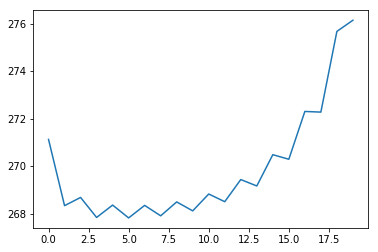

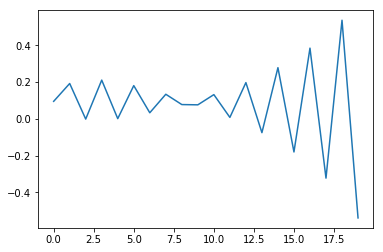

convergence


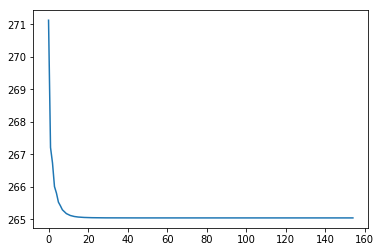

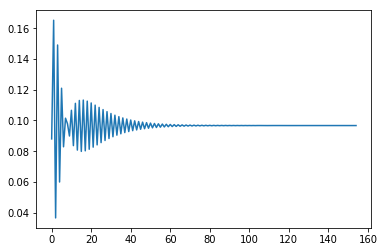

In [0]:
def gd_const_graph(f,fp,y,A,xinit,ss,maxit,tol):
  """
  f is the handle for the minimization objective
  fp is the handle for the gradient
  y is the input observation vector
  A is the input matrix of covariates
  x_init is the initalized value of the regression coefficient
  ss is the constant step size
  maxit and tol help you terminate the iterations
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  objList = []
  coef = []
  stop = False
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    objList.append(value)
    update = np.subtract(xList[count], (ss*gradient))
    xList.append(update)
    coef.append(update[0])
    count+=1
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return coef, objList, count

np.random.seed(0)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)
y = np.random.poisson(np.exp(rate))
xinit = np.zeros_like(x)
ss_init = .13
xFin, values, count = gd_const_graph(objective,gradient,y,A,xinit,ss_init,20,tol)

plt.plot(range(0,count), values)


plt.show()

plt.plot(range(0,count), np.squeeze(xFin))

plt.show()

np.random.seed(0)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)
y = np.random.poisson(np.exp(rate))
xinit = np.zeros_like(x)
ss_init = .12
xFin, values, count = gd_const_graph(objective,gradient,y,A,xinit,ss_init,1000,tol)

plt.plot(range(0,count), values)


plt.show()

plt.plot(range(0,count), np.squeeze(xFin))

plt.show()

Having never used matplot I struggled to get the axes of the graph to make sense. However, there is a clear difference between the graph as the decent is converging and the graph of a diverging decent. The coefficients of the converging set clearly aproach a minimal value until convergence. The diverging example clearly overshoots the minimal value and instead ocilates quite dramatically. It's interesting to see an algorithim designed to find a minimum fail so drastically. 

**d**.    Try different initializations of x as input to the line search method. Does the solution depend on it? Why?



In [0]:
np.random.seed(0)
M= 200
N= 5

A = np.random.normal(0, .25, (M,N))
x = np.random.normal(0, .25, (N,1))
rate = np.dot(A, x)
y = np.random.poisson(np.exp(rate))

xinit = np.zeros_like(x)
ss_init = 1
maxit = 10000
tol = 1e-15

gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)

xinit = np.array([[1],[2],[2],[2],[.5]])
gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)

xinit = np.array([[2],[4],[2],[3],[4]])
gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)

xinit = np.array([[10],[4],[2],[3],[4]])
gd_ls(objective,gradient,y,A,xinit,ss_init,maxit,tol)

NameError: ignored

Convergence does not depend on the initialization of x due to the characteristics of backtracking line search. However, for x values that are rather large there are overflow errors due to the limitations of the objective and gradient functions. Clearly there is an error in my implementation, but I was unable to troubleshoot and fix this error.

**e**.  Load the given data file noisy.npz. Use your code to recover the signal x. Reshape it to a 40 × 40
matrix. Visualize it as an image in grayscale using matplotlib. What do you think is the original
image?


In [0]:
from google.colab import drive 
drive.mount('drive')

In [0]:
def gd_ls_graph(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  coef = []
  stop = False
  a = 1
  b = .5
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    t = ss_init
    while f(y, A, np.subtract(xList[count], (t*gradient))) > value - a/2*t*math.pow(np.linalg.norm(gradient, 2),2):
      t = b*t
    update = np.subtract(xList[count], (t*gradient))
    xList.append(update)
    coef.append(update[0])
    count+=1
    #print(xList[count])
    #print(value)
    #print(f(y, A, xList[count]))
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], count, coef

with np.load('drive/My Drive/noisy_.npz') as data:
    A = data['A']
    y = data['y']
print(A)
#print(y)
A[:, np.newaxis]
y[:, np.newaxis]
ss_init = .000001
maxit = 1000
tol = 1e-15
#print(A.shape)
#print(y.shape)
#print(xinit.shape)

xinit = np.ones(1600)

#y = rate = np.dot(A, xinit)
#y = np.random.poisson(np.exp(rate))

#print(y)

xFin2, count2, coef = gd_ls_graph(objective,gradient,y,A,xinit,ss_init,10000,tol)
print(xFin2)
img = xFin2.reshape((40,40))

plt.plot(range(0,count2), np.squeeze(coef))

plt.show()

import matplotlib.image as mpimg
plt.gray()
imgplot = plt.imshow(img)

Unfortunately I was unable to find any sort of image. I'm hoping it was due to an error in how I converted the coefficient vector into a matrix. However, I also at time was very limited by overflow errors. There may have been a mistake in one of my methods. Late submission by 3 minutes but I see the logo!!

#Add Colab link here: # https://colab.research.google.com/drive/1xo9N3CSbbYAnFqUDpYb67QXkOZ3l9rIb